In [3]:
import os
import numpy as np
import scipy as sp
import librosa
import matplotlib.pyplot as plt
import pywt
import sounddevice as sd
import sympy
import soundfile

In [4]:
#3.1 -> #load input signal A+ sample with 16kHz

sr=16000
#sidenote:allazei to path ana PC
#x1a,fs1 = librosa.load(r"C:\Users\Manos Anastassis\Desktop\1h Ergastiriaki Askisi\Ekfwnisi\speech_utterance.wav",sr)
x1a,fs1 = soundfile.read("speech_utterance.wav")
sd.play(x1a,16000)

0.02


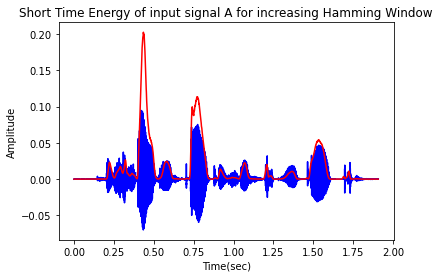

0.021


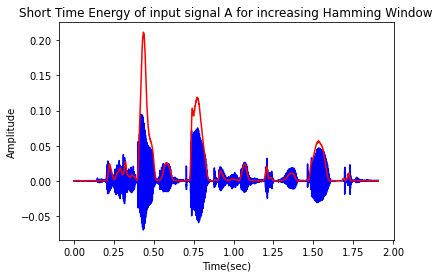

0.022


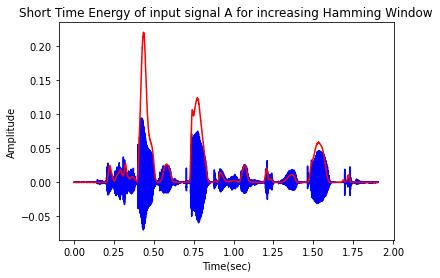

0.023


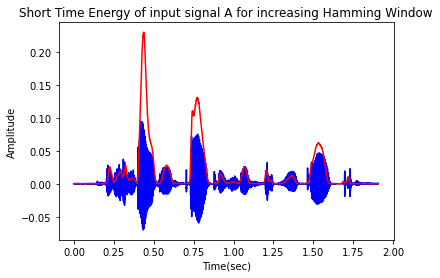

0.024


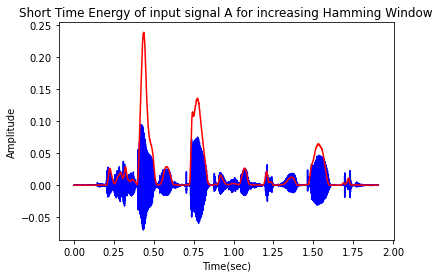

0.025


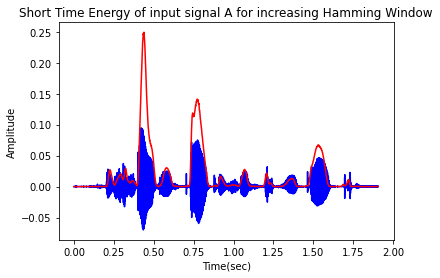

0.026000000000000002


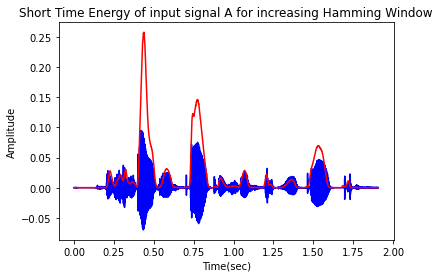

0.027


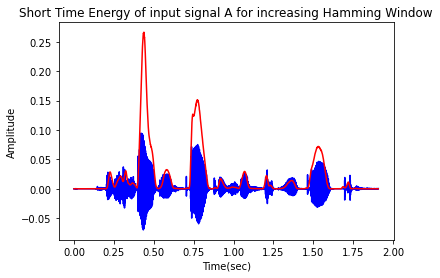

0.028


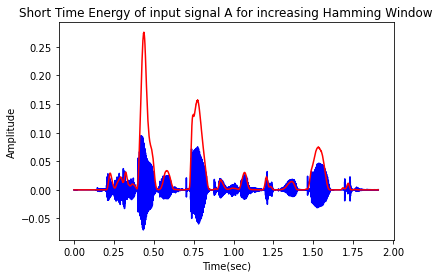

0.029


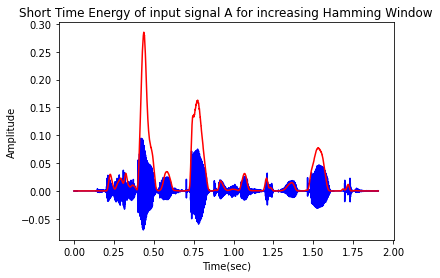

In [5]:
#3.1 -> STE for window time [20ms,30ms]

for i in range(10) :
    
    ts1=1/fs1
    win_length=0.02 + i*0.001 
    print(win_length)
    N1=win_length*fs1 # Samples of Hamming Window == T_window*fs 
    w1=np.hamming(N1) #create the hamming window
    duration1=len(x1a)*ts1# T_signal=Samples*ts
    x1b=np.square(x1a) #the input signal A but squared
    E1=np.convolve(x1b,w1) #STE computation
    
    ta=np.linspace(0,duration1,len(x1a)) #linspace for input signal
    plt.plot(ta,x1a,color='blue') #plot input signal
    tb=np.linspace(0,duration1,len(E1)) #linspace for STE
    plt.plot(tb,E1,color='red')
    plt.xlabel('Time(sec)')
    plt.ylabel('Amplitude')
    plt.title("Short Time Energy of input signal A for increasing Hamming Window")
    plt.show()


0.02


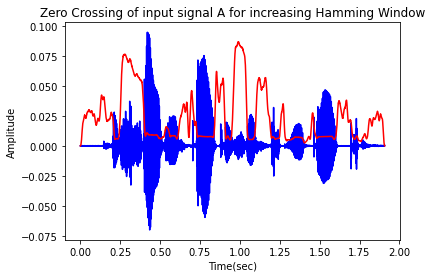

0.021


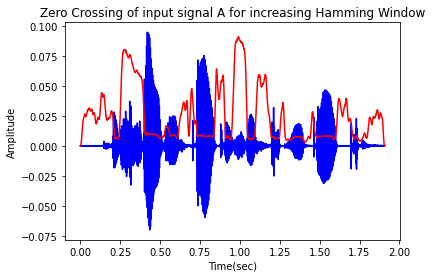

0.022


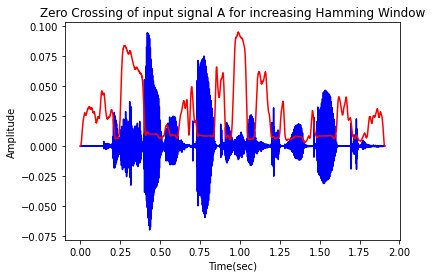

0.023


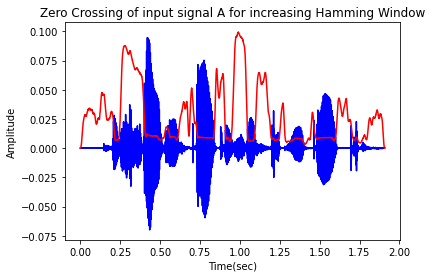

0.024


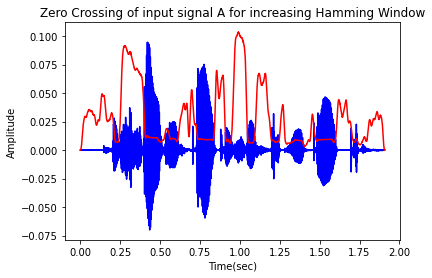

0.025


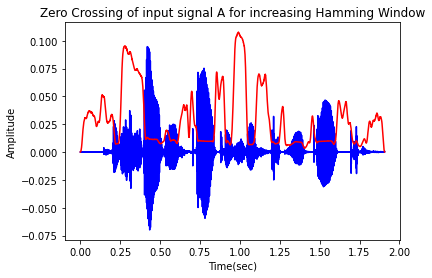

0.026000000000000002


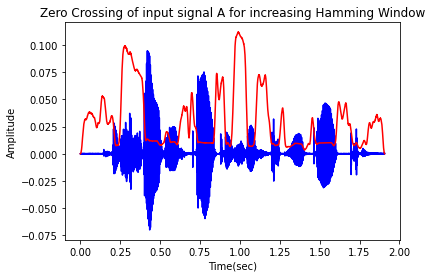

0.027


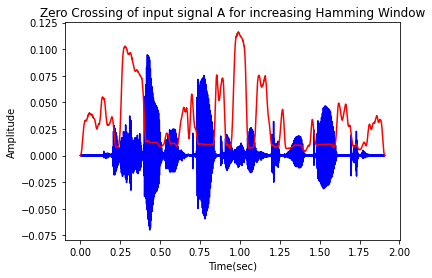

0.028


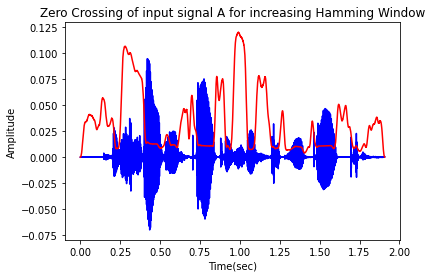

0.029


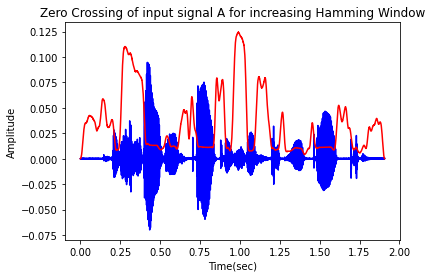

In [6]:
#3.1 -> Zero Crossing(ZC) for window time [20ms,30ms]

for i in range(10) :
    
    ts1=1/fs1
    win_length=0.02 + i*0.001
    print(win_length)
    N1=win_length*fs1 # Samples of Hamming Window == T_window*fs 
    w1=np.hamming(N1) #create the hamming window
    duration1=len(x1a)*ts1# T_signal=Samples*ts
    x1b=np.zeros(len(x1a))
    for j in range(len(x1a)):
        x1b[j]=np.abs(np.sign(x1a[j])-np.sign(x1a[j-1]))#define the first part of the convolve function
    Z1=np.convolve(x1b,w1)#ZC computation
    Z1=Z1/3000 #kanonikopoisi wste na sugkrinoume input signal kai ZC stin idia klimaka
    
    ta=np.linspace(0,duration1,len(x1a)) #linspace for input signal
    plt.plot(ta,x1a,color='blue') #plot input signal
    tb=np.linspace(0,duration1,len(Z1)) #linspace for ZC
    plt.plot(tb,Z1,color='red') #plot ZC
    plt.xlabel('Time(sec)')
    plt.ylabel('Amplitude')
    plt.title("Zero Crossing of input signal A for increasing Hamming Window")
    plt.show()


In [8]:
#3.2 -> #load input signal B+ sample with 16kHz

sr=16000
x2a,fs2 = soundfile.read("music.wav")
#sidenote:allazei to path ana PC
sd.play(x2a,16000)

0.02


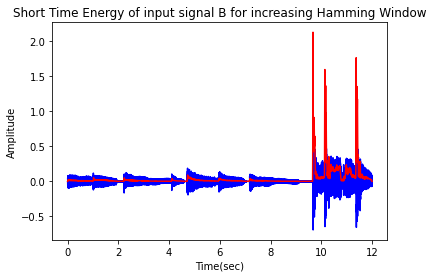

0.021


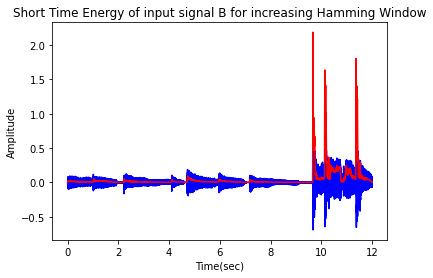

0.022


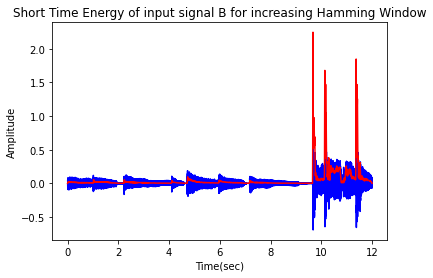

0.023


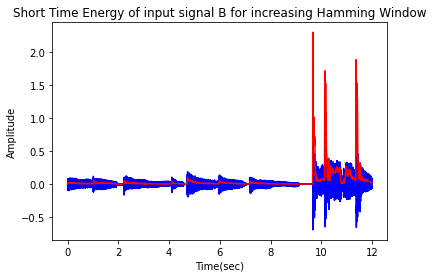

0.024


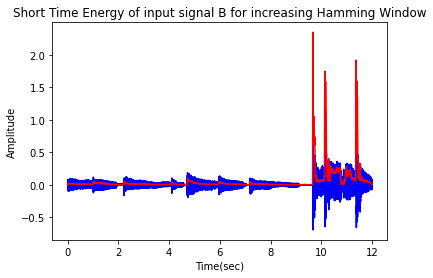

0.025


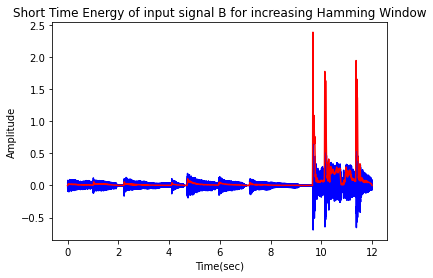

0.026000000000000002


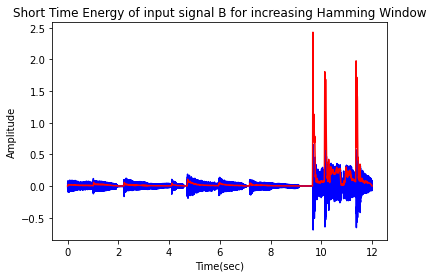

0.027


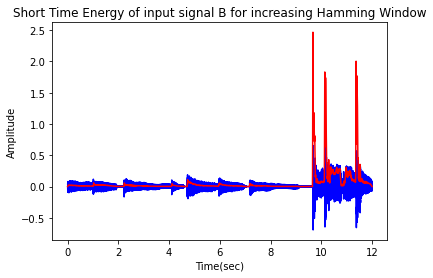

0.028


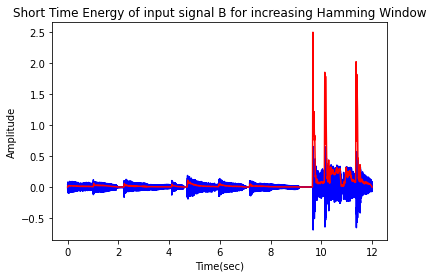

0.029


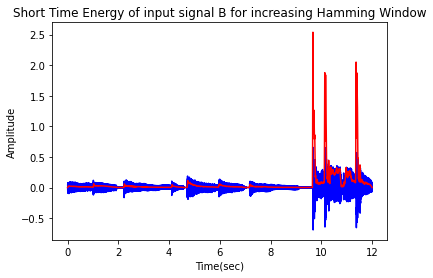

In [9]:
#3.2 -> STE of input signal B for window time [20ms,30ms]

for i in range(10) :
    
    ts2=1/fs2
    win_length=0.02 + i*0.001 
    print(win_length)
    N2=win_length*fs2 # Samples of Hamming Window == T_window*fs 
    w2=np.hamming(N2) #create the hamming window
    duration2=len(x2a)*ts2# T_signal=Samples*ts
    x2b=np.square(x2a) #the input signal A but squared
    E2=np.convolve(x2b,w2) #STE computation
    E2=E2/20 #kanonikopoihsh
    
    
    ta=np.linspace(0,duration2,len(x2a)) #linspace for input signal
    plt.plot(ta,x2a,color='blue') #plot input signal
    tb=np.linspace(0,duration2,len(E2)) #linspace for STE
    plt.plot(tb,E2,color='red')
    plt.xlabel('Time(sec)')
    plt.ylabel('Amplitude')
    plt.title("Short Time Energy of input signal B for increasing Hamming Window")
    plt.show()

0.02


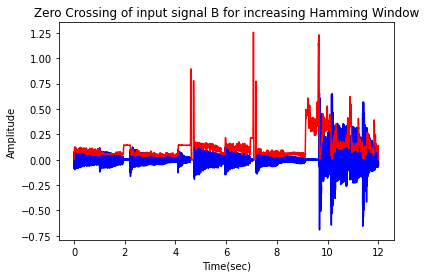

0.021


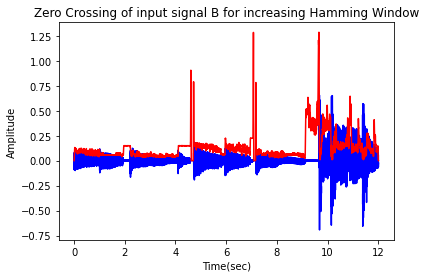

0.022


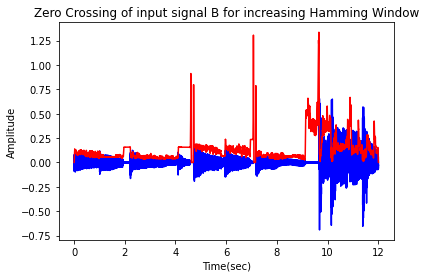

0.023


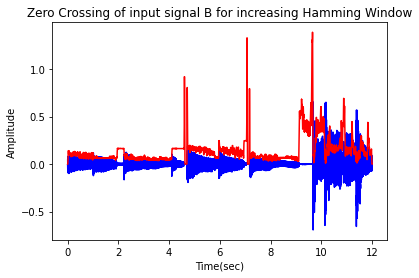

0.024


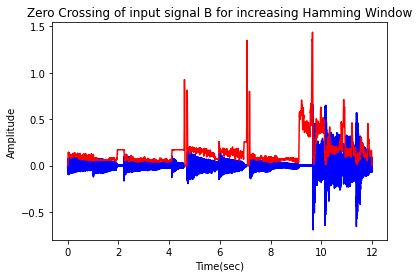

0.025


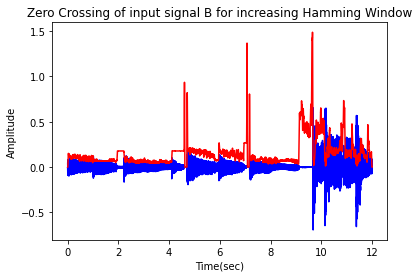

0.026000000000000002


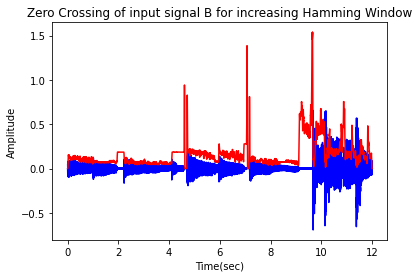

0.027


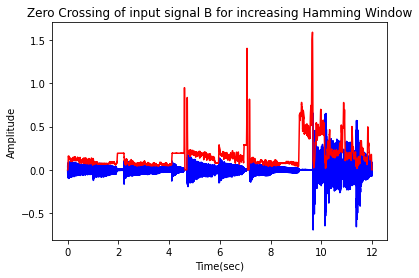

0.028


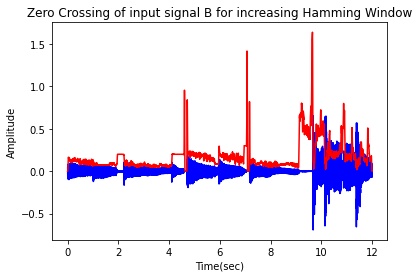

0.029


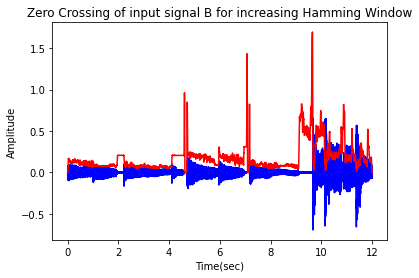

In [10]:
#3.2 -> Zero Crossing(ZC) for window time [20ms,30ms]

for i in range(10) :
    
    ts2=1/fs2
    win_length=0.02 + i*0.001
    print(win_length)
    N2=win_length*fs2 # Samples of Hamming Window == T_window*fs 
    w2=np.hamming(N2) #create the hamming window
    duration2=len(x2a)*ts2# T_signal=Samples*ts
    x2b=np.zeros(len(x2a))
    for j in range(len(x2a)):
        x2b[j]=np.abs(np.sign(x2a[j])-np.sign(x2a[j-1]))#define the first part of the convolve function
    Z2=np.convolve(x2b,w2)#ZC computation
    Z2=Z2/200 #kanonikopoisi wste na sugkrinoume input signal kai ZC stin idia klimaka
    
    ta=np.linspace(0,duration2,len(x2a)) #linspace for input signal
    plt.plot(ta,x2a,color='blue') #plot input signal
    tb=np.linspace(0,duration2,len(Z2)) #linspace for ZC
    plt.plot(tb,Z2,color='red') #plot ZC
    plt.xlabel('Time(sec)')
    plt.ylabel('Amplitude')
    plt.title("Zero Crossing of input signal B for increasing Hamming Window")
    plt.show()

In [ ]:
#sumperasmata:
#auksisi hamming window length -> veltiwsi grafikwn (pio smooth output), an kai mikri diafora (afou auksanoume 
#to win_length kata ligo kathe fora)
#STE -> Ipsiles times se ipsila plati simatos (fwnienta)
#       Xamiles times se xamila plati simatos (sumfwna)     
#ZC -> Anapoda apo STE (afou ta fwienta exoun ipsila plati ara kai liges enallages prosimou)
#ZC-> peak simatos antistoixei se midenismo ZC simatos